In [1]:
import os
os.chdir('../')

import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

import shap
shap.initjs()

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('artifacts/svc:v1/svc.pkl', 'rb') as file:
    svc = pkl.load(file)

In [3]:
data = pd.read_csv('artifacts/acute-stroke-selected:v2/new_data.csv')

In [4]:
X, y = data.drop('discharge_status', axis=1), data['discharge_status']

### SHAP Kernel Explainer

In [5]:
explainer = shap.KernelExplainer(lambda x: svc.predict_proba(x)[:, 1], X)
shap_values = explainer(X)

Using 105 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/105 [00:00<?, ?it/s]

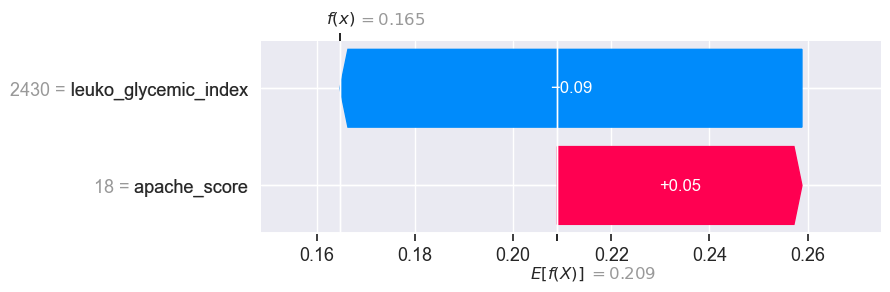

In [10]:
shap.plots.waterfall(shap_values[0])

### Absolute Mean SHAP

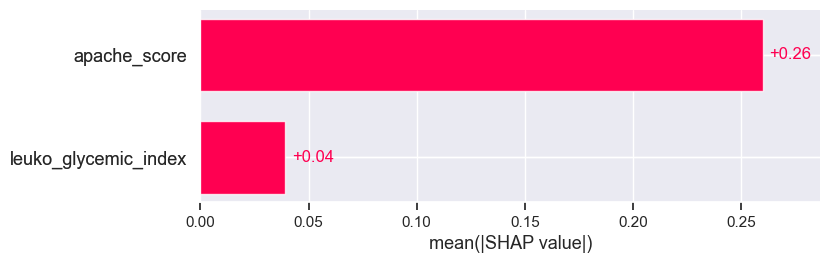

In [7]:
shap.plots.bar(shap_values)

### Dependence Plots

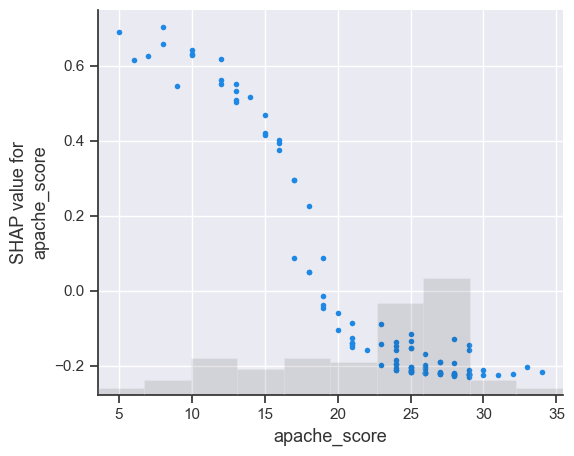

In [8]:
shap.plots.scatter(shap_values[:,'apache_score'])

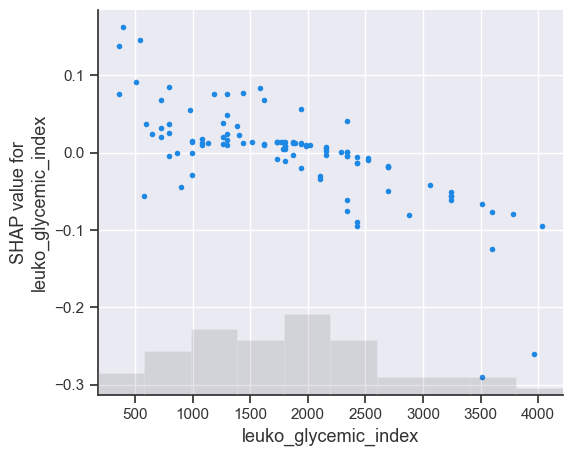

In [9]:
shap.plots.scatter(shap_values[:,'leuko_glycemic_index'])